In [1]:
import pandas as pd


df = pd.DataFrame({"A":[1,2,3,4,5], "B":[6,7,8,9,10]})
df["A"]>3

0    False
1    False
2    False
3     True
4     True
Name: A, dtype: bool

1. Precision（適合率） - 予測したクラス（例：setosa, versicolor, virginica）において、どれだけ正確だったかを示します。例えば、setosaと予測されたものの中で、実際にsetosaであった割合です。
2. Recall（再現率） - 実際のクラスにおいて、どれだけ正確に予測できたかを示します。例えば、実際のsetosaの中で、どれだけ正確にsetosaと予測されたかです。
3. F1-Score（F1スコア） - PrecisionとRecallの調和平均です。バランスの取れた指標で、高いほど良い性能を示します。
4. Support（サポート） - 各クラスのサンプル数です。この例では、setosaが19個、versicolorが13個、virginicaが13個です。

In [3]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# アイリスデータセットの読み込み
iris = load_iris()
X = iris.data
y = iris.target

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ランダムフォレスト分類器の訓練
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# テストデータに対する予測
y_pred = clf.predict(X_test)

# 分類レポートの表示
print(classification_report(y_test, y_pred, target_names=iris.target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



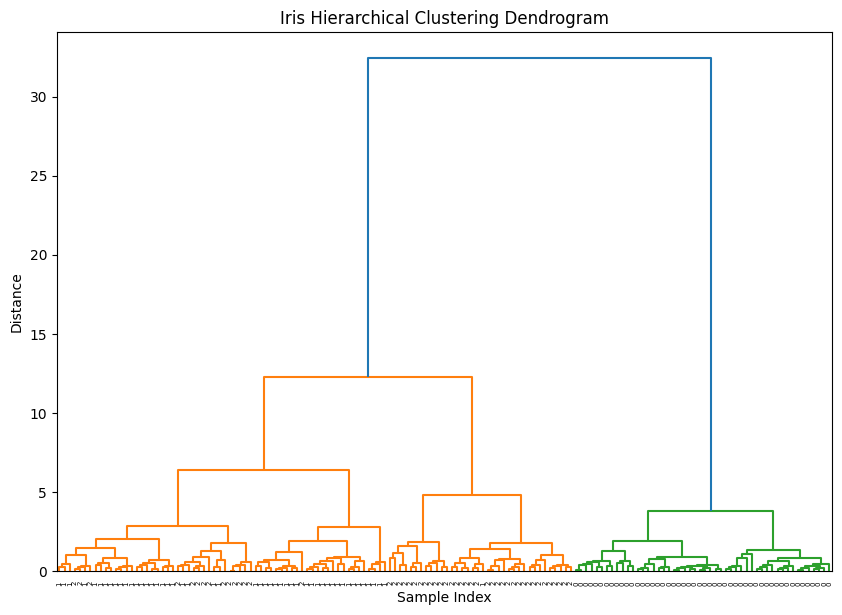

In [5]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np


# アイリスデータセットの読み込み
iris = load_iris()
X = iris.data

# 階層的クラスタリングの実施（ここではWard法を使用）
linked = linkage(X, method='ward')

# 樹形図（デンドログラム）の作成
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=np.array(iris.target),
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


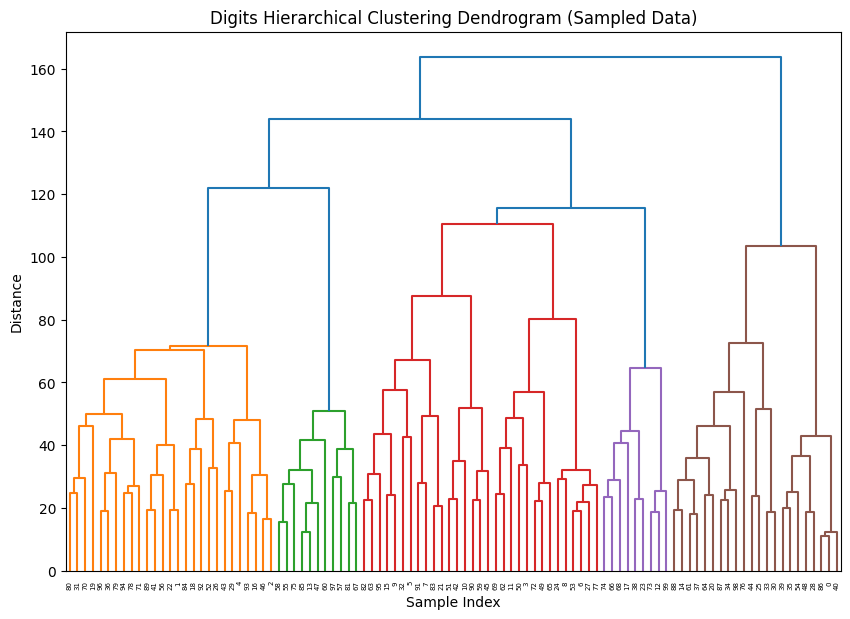

In [6]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_digits
import numpy as np

# 手書き数字データセットの読み込み（データサイズが大きい例）
digits = load_digits()
X = digits.data

# データのサンプリング：ランダムにデータを選択
np.random.seed(42) # 結果の再現性のため
indices = np.random.choice(range(len(X)), size=100, replace=False) # 100個のサンプルをランダムに選択
# NumPyのファンシーインデックス
X_sampled = X[indices]

# 階層的クラスタリングの実施（ここではWard法を使用）
linked = linkage(X_sampled, method='ward')

# 樹形図（デンドログラム）の作成
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Digits Hierarchical Clustering Dendrogram (Sampled Data)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()
